# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import requests
import json
import glob
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import os

In [2]:
# load the twitter_archive.csv data
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# get the url link
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url) # downloading the data using the request GET method
with open(os.path.join(r'C:\Users\Sir_Praise\Documents\Udacity\Data Analyst Nanodegree\PART 3 Data Wrangling\Untitled Folder', url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content) # loading the selected data from the link to a directory 

In [4]:
image_df = pd.read_table('image_predictions.tsv') # reading the table data

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
df_list = [] # create a dataframe list

# open the data txt file
with open('tweet_json.txt', 'r') as j_file:
    # loop through the lines
    for twt_line in j_file.readlines():
        # we start getting the desired columns
        single_twtline = json.loads(twt_line)
        tweet_id = single_twtline['id']
        retweet_count = single_twtline['retweet_count']
        favorite_count = single_twtline['favorite_count']
        friends_count = single_twtline['user']['friends_count']
        following = single_twtline['user']['following']
        retweeted = single_twtline['retweeted']
        
        # we append the obtained data into the list
        df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count,
                        'friends_count': friends_count,
                        'retweeted': retweeted,
                        'following': following
                       })

# we read the data into the pandas dataframe
tweetjson_df = pd.DataFrame(df_list)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### 1. Visual data quality accessment

In [6]:
twitter_archive # overview of data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
tweetjson_df

,tweet_id,retweet_count,favorite_count,friends_count,retweeted,following
0,892420643555336193,8853,39467,104,False,True
1,892177421306343426,6514,33819,104,False,True
2,891815181378084864,4328,25461,104,False,True
3,891689557279858688,8964,42908,104,False,True
4,891327558926688256,9774,41048,104,False,True
5,891087950875897856,3261,20562,104,False,True
6,890971913173991426,2158,12041,104,False,True
7,890729181411237888,16716,56848,104,False,True
8,890609185150312448,4429,28226,104,False,True
9,890240255349198849,7711,32467,104,False,True


In [8]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### 2. Programmatic data quality accessment

In [9]:
twitter_archive.name.unique() # check unique values

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [10]:
twitter_archive.source.value_counts() # check unique values

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [11]:
twitter_archive.isnull().sum() # checking for missing values

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
twitter_archive.duplicated().sum() # checking for duplicated rows

0

In [13]:
image_df.duplicated().sum() # checking for duplicated rows

0

In [14]:
tweetjson_df.duplicated().sum() # checking for duplicated rows

0

In [15]:
image_df.info() # accessing for more information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
tweetjson_df.info() # accessing for more information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
friends_count     2354 non-null int64
retweeted         2354 non-null bool
following         2354 non-null bool
dtypes: bool(2), int64(4)
memory usage: 78.3 KB


In [17]:
twitter_archive.info() # accessing for more information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
image_df['img_num'].value_counts() # check unique values

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [19]:
image_df.p1_dog.unique() # check unique values

array([ True, False])

In [20]:
image_df['p3'].unique() # check unique values

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese',
       'Ibizan_hound', 'French_bulldog', 'malinois', 'Dandie_Dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'Eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat-coated_retriever', 'gar', 'Chihuahua',
       'Shih-Tzu', 'Pomeranian', 'dingo', 'power_drill', 'Saluki',
       'Great_Pyrenees', 'West_Highland_white_terrier', 'collie',
       'toy_poodle', 'vizsla', 'acorn', 'giant_schnauzer', 'teddy',
       'common_iguana', 'wig', 'water_buffalo', 'coyote', 'seat_belt',
       'kelpie', 'space_heater', 'Brabancon_griffon', 'standard_poodle',
       'beagle', 'Irish_water_spaniel', 'bluetick', 'Weimaraner',
       'Chesapeake_Bay_retriever', 'toilet_tiss

In [21]:
image_df['p1'].unique() # check unique values

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [22]:
tweetjson_df.retweeted.value_counts() # check unique values

False    2354
Name: retweeted, dtype: int64

In [23]:
tweetjson_df.following.value_counts() # check unique values

True    2354
Name: following, dtype: int64

In [24]:
twitter_archive['name'].value_counts() # check unique values

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Gordon       1
Godi         1
Rey          1
Edmund       1
Ember        1
Name: name, Length: 957, dtype: int64

In [25]:
twitter_archive['rating_denominator'].unique() # check unique values

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [26]:
twitter_archive['rating_numerator'].value_counts() # check unique values

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

### Quality issues
1. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id columns names in the `twitter_archive` need their data types to be changed to integer


2. Majority of column values in the `twitter_archive` data are missing (e.g in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, etc.)


3. p1, p1_conf, p1_dog, p3, p3_conf, p3_dog will be renamed to more understandable name for the `image_predictions` data


4. rating_denominator in the `twitter_archive` should  be corrected as its not expected to exceed 10 


5. rating_numerator's data points above 15 in the `twitter_archive` will be replaced as there are much outliers


6. The date column in the `twitter_archive` data need to be converted to datetime datatype


7. The name value in the `twitter_archive` data has an invalide value 'a'


8. The '-' will be replaced with '_' for p1, p2, p3  columns to maintain uniformity in the `image_predictions` data 


9. We need to rename the timestamp to date since we have only the date to be obtained for that column

### Tidiness issues
1. The date part of the timestamp column in the `twitter_archive` data should be obtained

2. The source column for the `twitter_archive` data should be removed as as its made of too many irregualar data format

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [27]:
# Make copies of original pieces of data
twitter_arch = twitter_archive.copy()
image_dogs = image_df.copy()
tweet_json = tweetjson_df.copy()

### Issue #1: Data quality

#### Define: 
1. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id columns names in the `twitter_archive` need their data types to be changed to integer

#### Code

First, we need to replace all the nan values with 0 so as to be able to do the conversion

In [28]:
twitter_arch[['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
              'retweeted_status_user_id']] = twitter_arch[['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
              'retweeted_status_user_id']].fillna(0)

In [29]:
twitter_arch[['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
              'retweeted_status_user_id']] = twitter_arch[['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
              'retweeted_status_user_id']].astype(int)

#### Test

In [30]:
twitter_arch.dtypes

tweet_id                       int64
in_reply_to_status_id          int32
in_reply_to_user_id            int32
timestamp                     object
source                        object
text                          object
retweeted_status_id            int32
retweeted_status_user_id       int32
retweeted_status_timestamp    object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

### Issue #2: Data quality


#### Define
Majority of column values in the `twitter_archive` data are missing (e.g in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp). They will be dropped since over 90% of those columns are missing.

#### Code

In [31]:
twitter_arch.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
              'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True);

#### Test

In [32]:
twitter_arch.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #3: Data quality

#### Define
p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog will be renamed to more understandable name for the `image_predictions` data

#### Code

In [33]:
image_dogs.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [34]:
image_dogs = image_dogs.rename(columns={'p1':'first_prediction',
                                        'p1_conf': 'first_pred_confidence',
                                        'p1_dog': 'first_Dogbreed_prediction',
                                        'p2': 'second_prediction',
                                        'p2_conf': 'second_pred_confidence',
                                        'p2_dog': 'second_Dogbreed_prediction',
                                        'p3': 'third_prediction',
                                        'p3_conf': 'third_pred_confidence',
                                        'p3_dog': 'third_Dogbreed_prediction',
                                       })

#### Test

In [35]:
image_dogs.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'first_prediction',
       'first_pred_confidence', 'first_Dogbreed_prediction',
       'second_prediction', 'second_pred_confidence',
       'second_Dogbreed_prediction', 'third_prediction',
       'third_pred_confidence', 'third_Dogbreed_prediction'],
      dtype='object')

### Issue #4: Data quality

#### Define
rating_denominator in the `twitter_archive` should  be corrected as its not expected to exceed 10. Replace value with 0

#### Code

In [36]:
twitter_arch[twitter_arch['rating_denominator'] > 10] = 0

#### Test

In [37]:
twitter_arch['rating_numerator'].value_counts()

12      558
11      463
10      461
13      351
9       156
8       102
14       54
7        54
5        37
6        32
0        22
3        19
4        15
2         9
1         9
75        2
420       2
15        2
26        1
24        1
182       1
27        1
960       1
1776      1
17        1
666       1
Name: rating_numerator, dtype: int64

### Issue #5: Data quality

#### Define
rating_numerator's data points above 15 in the `twitter_archive` will be replaced as there are much outliers

#### Code

In [38]:
twitter_arch[twitter_arch['rating_numerator'] > 15] = 0 

#### Test

In [39]:
twitter_arch['rating_numerator'].value_counts()

12    558
11    463
10    461
13    351
9     156
8     102
7      54
14     54
5      37
0      34
6      32
3      19
4      15
1       9
2       9
15      2
Name: rating_numerator, dtype: int64

### Issue #7:  Data quality

#### Define
The name value in the `twitter_archive` data has an invalide value 'a'

#### Code

In [40]:
twitter_arch[twitter_arch['name'] == 'a'] = 'None' 

#### Test

In [41]:
twitter_arch['name'].value_counts()

None       776
0           32
Charlie     12
Cooper      11
Oliver      11
          ... 
Ito          1
Comet        1
Opie         1
Randall      1
Mack         1
Name: name, Length: 953, dtype: int64

### Issue #8: Data quality

#### Define
The '-' will be replaced with '_' for p1, p2, p3  columns to maintain uniformity in the `image_df` data 

#### Code

In [42]:
image_dogs_list = image_dogs[['first_prediction', 'second_prediction', 'third_prediction']].values.tolist()

for val in image_dogs_list: # Finish the first line of the for loop here
    image_dogs[['first_prediction', 'second_prediction', 'third_prediction']].replace('-', '_', inplace=True);

C:\Users\Sir_Praise\anaconda3\lib\site-packages\pandas\core\frame.py:4258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


#### Test

In [43]:
image_dogs['third_prediction'].unique()

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese',
       'Ibizan_hound', 'French_bulldog', 'malinois', 'Dandie_Dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'Eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat-coated_retriever', 'gar', 'Chihuahua',
       'Shih-Tzu', 'Pomeranian', 'dingo', 'power_drill', 'Saluki',
       'Great_Pyrenees', 'West_Highland_white_terrier', 'collie',
       'toy_poodle', 'vizsla', 'acorn', 'giant_schnauzer', 'teddy',
       'common_iguana', 'wig', 'water_buffalo', 'coyote', 'seat_belt',
       'kelpie', 'space_heater', 'Brabancon_griffon', 'standard_poodle',
       'beagle', 'Irish_water_spaniel', 'bluetick', 'Weimaraner',
       'Chesapeake_Bay_retriever', 'toilet_tiss

### Issue #9: Data Quality

#### Define
We need to rename the timestamp in the `twitter_archive` data to date since we have only the date obtained for that column

#### Code

In [44]:
twitter_arch.rename(columns={'timestamp':'date'}, inplace=True);

#### Test

In [45]:
twitter_arch.head(1)

,tweet_id,date,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Issue #10: Tidiness issues

#### Define
The date part of the date (timestamp) column in the `twitter_archive` data should be obtained

#### Code

In [46]:
twitter_arch['date'] = pd.to_datetime(twitter_arch['date'], errors='coerce').dt.date

#### Test

In [47]:
twitter_arch.head(1)

,tweet_id,date,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Issue #6:  Data quality

#### Define
The date column in the `twitter_archive` data need to be converted to datetime datatype

#### Code

In [48]:
twitter_arch['date'] = pd.to_datetime(twitter_arch['date'])

#### Test

In [49]:
twitter_arch.dtypes

tweet_id                      object
date                  datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator              object
rating_denominator            object
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

### Issue #11: Tidiness issues

#### Define
The source column for the `twitter_archive` data should be removed as as its made of too many irregualar data format

#### Code

In [50]:
twitter_arch.drop(columns=['source'], axis=1, inplace=True);

#### Test

In [51]:
twitter_arch.head(1)

,tweet_id,date,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

**We need to merge the 3 datasets**

This merging will be done on the tweet_id column

In [52]:
# Make copies of original pieces of data
twitter_arch.head(1)

,tweet_id,date,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [53]:
image_dogs.head(1)

,tweet_id,jpg_url,img_num,first_prediction,first_pred_confidence,first_Dogbreed_prediction,second_prediction,second_pred_confidence,second_Dogbreed_prediction,third_prediction,third_pred_confidence,third_Dogbreed_prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [54]:
tweet_json.head(1)

,tweet_id,retweet_count,favorite_count,friends_count,retweeted,following
0,892420643555336193,8853,39467,104,False,True


In [55]:
temp_df = twitter_arch.merge(image_dogs, how='right', on='tweet_id') # merge df1, df2 

In [56]:
general_df = temp_df.merge(tweet_json, how='right', on='tweet_id') # merge (df1+df2) and df3

In [57]:
general_df.head(1)

,tweet_id,date,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,second_pred_confidence,second_Dogbreed_prediction,third_prediction,third_pred_confidence,third_Dogbreed_prediction,retweet_count,favorite_count,friends_count,retweeted,following
0,8.918152e+17,2017-07-31,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,...,0.078253,True,kelpie,0.031379,True,4328,25461,104,False,True


In [58]:
# saving the data
general_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [59]:
archive_master = pd.read_csv('twitter_archive_master.csv')

In [60]:
archive_master.shape

(2354, 27)

In [61]:
archive_master.dropna(axis=0, inplace=True);

In [62]:
archive_master.shape

(1299, 27)

In [63]:
archive_master.head()

,tweet_id,date,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,second_pred_confidence,second_Dogbreed_prediction,third_prediction,third_pred_confidence,third_Dogbreed_prediction,retweet_count,favorite_count,friends_count,retweeted,following
0,8.918152e+17,2017-07-31,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,...,0.078253,True,kelpie,0.031379,True,4328,25461,104,False,True
1,8.916896e+17,2017-07-30,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,...,0.168086,True,spatula,0.040836,False,8964,42908,104,False,True
2,8.913276e+17,2017-07-29,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,...,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,104,False,True
3,8.910880e+17,2017-07-29,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,None,None,None,...,0.116317,True,Indian_elephant,0.076902,False,3261,20562,104,False,True
4,8.907292e+17,2017-07-28,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,None,None,None,...,0.178406,True,Pembroke,0.076507,True,16716,56848,104,False,True


### Visualization

## What are the common names of dogs?

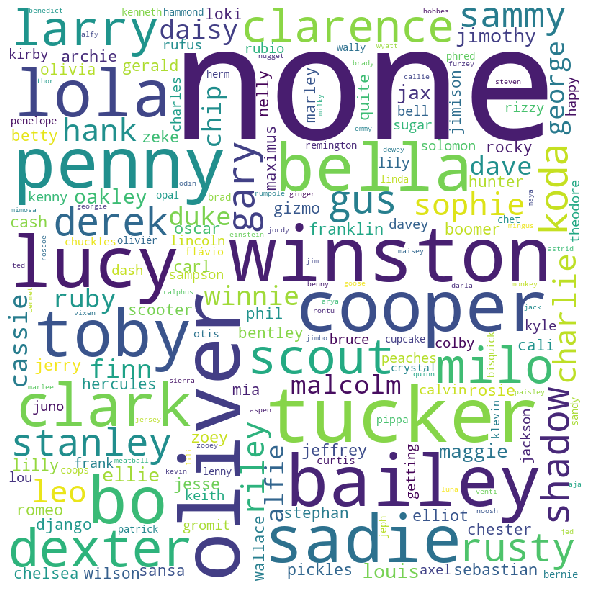

In [64]:
words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in archive_master.name:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 15), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

While most persons did not specify the name of their dogs, it appears that majority of the dogs here are named Oliver, tucker, bella, cooper, clarence, winston lucy etc. 

## Which is the highest dog rating present in the tweets?

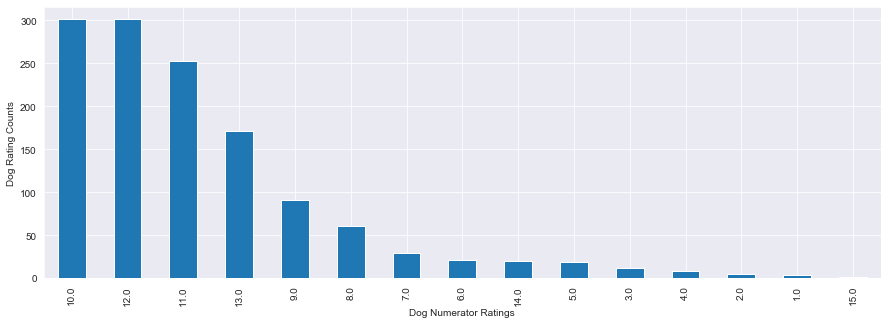

In [65]:
plt.figure(figsize = (15, 5), facecolor = None)
sns.set_style("darkgrid")
plt.ylabel('Dog Rating Counts')
plt.xlabel('Dog Numerator Ratings')
archive_master.rating_numerator.value_counts().plot(kind='bar');

It appears that the highest ratings are 10 and 12 out of 15. However, we need to understand which dog breed has the highest ratings.

### Which Dog stage has the highest ratings?

We need to create dataframes for these various dog stages

In [66]:
doggo_stages = archive_master[archive_master['doggo'] == 'doggo']
floofer_stages = archive_master[archive_master['floofer'] == 'floofer']
pupper_stages = archive_master[archive_master['pupper'] == 'pupper']
puppo_stages = archive_master[archive_master['puppo'] == 'puppo']

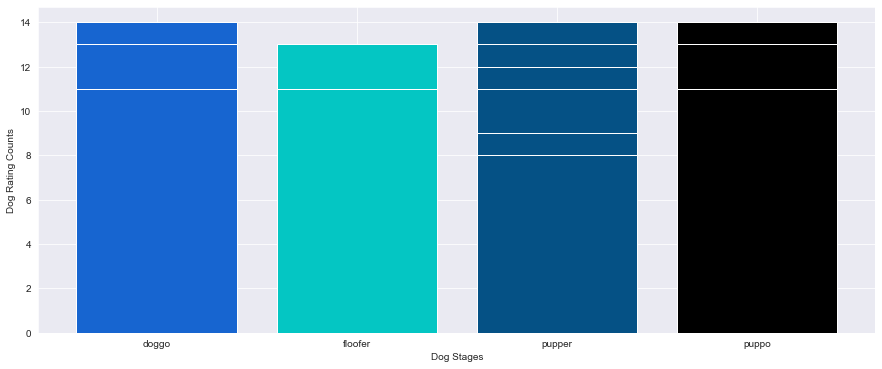

In [67]:
plt.figure(figsize = (15, 6), facecolor = None)

# make the barplots for all the breeds
plt.bar(doggo_stages['doggo'], doggo_stages['rating_numerator'], color='#1765D0')
plt.bar(floofer_stages['floofer'], floofer_stages['rating_numerator'], color='#04C6C3')
plt.bar(pupper_stages['pupper'], pupper_stages['rating_numerator'], color='#055185')
plt.bar(puppo_stages['puppo'], puppo_stages['rating_numerator'], color='black');
plt.ylabel('Dog Rating Counts');
plt.xlabel('Dog Stages');

The `doggo`, `pupper` and `puppo` happens to be the top rated dog stages

### Which Dog Stage has the highest Favourite Count?

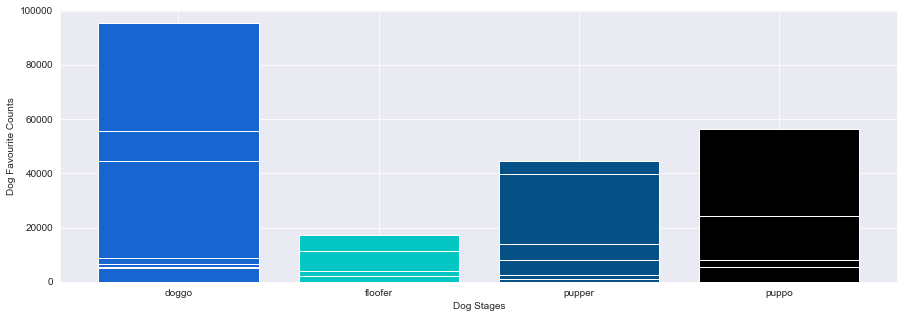

In [68]:
plt.figure(figsize = (15, 5), facecolor = None)

# make the barplots for all the breeds
plt.bar(doggo_stages['doggo'], doggo_stages['favorite_count'], color='#1765D0')
plt.bar(floofer_stages['floofer'], floofer_stages['favorite_count'], color='#04C6C3')
plt.bar(pupper_stages['pupper'], pupper_stages['favorite_count'], color='#055185')
plt.bar(puppo_stages['puppo'], puppo_stages['favorite_count'], color='black');
plt.ylabel('Dog Favourite Counts');
plt.xlabel('Dog Stages');

The most favourite of all the dog breeds happens to be the `doggo` breed

### Insights:
1. It appears that majority of the dogs here are named Oliver, tucker, bella, cooper, clarence, winston lucy etc. 

2. It appears that the highest ratings are 10 and 12 out of 15.

3. The `doggo`, `pupper` and `puppo` happens to be the top rated dog stages

4. The most favourite of all the dog stages happens to be the doggo stage